### Inferece from CLI

**Object Detection on Image**

In [2]:
import mlu_tools.utils as mlutils
import matplotlib.pyplot as plt
import cv2
from utils.consts import DATASET_DIR, MODEL_DIR
import os
from mlu_tools.validation import validate_file

2024-12-25 06:27:44.545453: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-25 06:27:52.170562: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
sample_images_dir = f"{DATASET_DIR}/sample_images"
sample_videos_dir = f"{DATASET_DIR}/sample_videos"
output_dir = f"{DATASET_DIR}/outputs"

In [8]:
# Downloading sample image
image_url = "https://drive.google.com/file/d/1b3Bd-YxBpIFeMAUoiABMk66Nr-VEYTqZ/view?usp=sharing"
os.makedirs(sample_images_dir, exist_ok=True)
saved_image_path = f"{sample_images_dir}/sun_flower.jpg"
mlutils.download(image_url, saved_image_path)

File already exists!


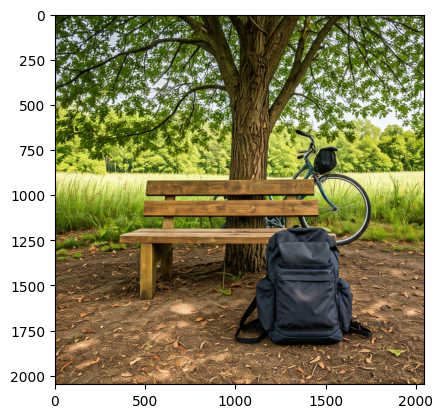

In [7]:
# Displaying sample image
plt.imshow(cv2.imread(saved_image_path)[..., ::-1])

In [8]:
# Inference on sample image
!yolo predict model="{MODEL_DIR}/yolo11n.pt" source="{saved_image_path}" project="{output_dir}"

Ultralytics 8.3.53 🚀 Python-3.10.14 torch-2.5.1+cu124 CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /home/vikas/Lab/Decoding NNs/datasets/sample_images/backpack.jpeg: 640x640 1 bicycle, 2 benchs, 1 backpack, 207.3ms
Speed: 5.8ms preprocess, 207.3ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /home/vikas/Lab/Decoding NNs/datasets/outputs/predict7
💡 Learn more at https://docs.ultralytics.com/modes/predict


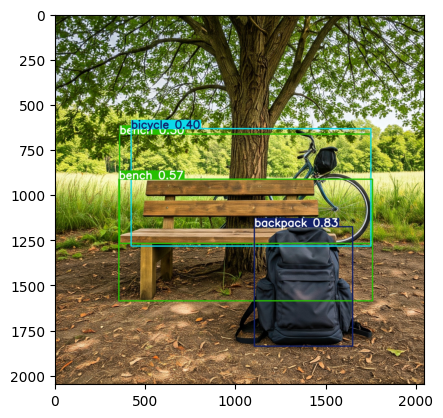

In [9]:
# Displaying output image
plt.imshow(cv2.imread(f"{output_dir}/predict7/backpack.jpg")[..., ::-1])

**Object Detection on Video**

In [13]:
# Downloading sample video
video_url = "https://drive.google.com/file/d/13xuYFdfnSmW3xPDyQtD9gXWSCQb_u4r5/view?usp=sharing"
os.makedirs(sample_videos_dir, exist_ok=True)
saved_video_path = f"{sample_videos_dir}/peacock.mp4"
mlutils.download(video_url, saved_video_path)

File already exists!


In [20]:
# Displaying sample video
from IPython.display import Video

Video(saved_video_path)

In [21]:
!yolo predict model="{MODEL_DIR}/yolo11n.pt" source="{saved_video_path}" project="{output_dir}"

Ultralytics 8.3.53 🚀 Python-3.10.14 torch-2.5.1+cu124 CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLO11n summary (fused): 238 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

video 1/1 (frame 1/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 142.6ms
video 1/1 (frame 2/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 197.9ms
video 1/1 (frame 3/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 118.7ms
video 1/1 (frame 4/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 135.8ms
video 1/1 (frame 5/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 133.2ms
video 1/1 (frame 6/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 129.2ms
video 1/1 (fra

In [23]:
!ffmpeg -i "{output_dir}/predict4/peacock.avi" -c:v libx264 -preset fast -crf 23 "{output_dir}/predict4/peacock.mp4"

ffmpeg version 5.1.6-0+deb12u1 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 12 (Debian 12.2.0-14)
  configuration: --prefix=/usr --extra-version=0+deb12u1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librist --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libsvtav1 --enable-libtheora --enable-libtwolame --enable-libvidstab --enab

In [24]:
# Displaying output video
from IPython.display import Video

Video(f"{output_dir}/predict4/peacock.mp4")

**Image Classification**

In [9]:
!yolo classify predict model="{MODEL_DIR}/yolo11n-cls.pt" source="{saved_image_path}" project="{output_dir}"

Ultralytics 8.3.53 🚀 Python-3.10.14 torch-2.5.1+cu124 CPU (Intel Core(TM) i5-8250U 1.60GHz)
YOLO11n-cls summary (fused): 112 layers, 2,807,024 parameters, 0 gradients, 4.2 GFLOPs

image 1/1 /home/vikas/Lab/Decoding NNs/datasets/sample_images/sun_flower.jpg: 224x224 lampshade 0.47, daisy 0.17, vase 0.09, table_lamp 0.07, wall_clock 0.02, 19.7ms
Speed: 41.9ms preprocess, 19.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /home/vikas/Lab/Decoding NNs/datasets/outputs/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


---

### Inference from Python code

**Object Detection on Image**

In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO(f"{MODEL_DIR}/yolo11n.pt")
results = model(saved_image_path, save=True, show=True, project=output_dir)
cv2.waitKey(0)
cv2.destroyAllWindows()


image 1/1 /home/vikas/Lab/Decoding NNs/datasets/sample_images/backpack.jpeg: 640x640 1 bicycle, 2 benchs, 1 backpack, 201.9ms
Speed: 7.3ms preprocess, 201.9ms inference, 3.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /home/vikas/Lab/Decoding NNs/datasets/outputs/predict8


**Object Detection on Video**

In [14]:
from ultralytics import YOLO
import cv2

model = YOLO(f"{MODEL_DIR}/yolo11n.pt")
results = model(saved_video_path, save=True, show=True, project=output_dir)
cv2.waitKey(0)
cv2.destroyAllWindows()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 134.9ms
video 1/1 (frame 2/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 207.0ms
video 1/1 (frame 3/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 116.5ms
video 1/1 (frame 4/448) /home/vikas/Lab/Decoding NN

**Object Tracking**

In [15]:
from ultralytics import YOLO
import cv2

model = YOLO(f"{MODEL_DIR}/yolo11n.pt")
results = model.track(saved_video_path, save=True, show=True, project=output_dir)
cv2.waitKey(0)
cv2.destroyAllWindows()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 107.0ms
video 1/1 (frame 2/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 254.4ms
video 1/1 (frame 3/448) /home/vikas/Lab/Decoding NNs/datasets/sample_videos/peacock.mp4: 384x640 1 person, 2 birds, 1 handbag, 118.3ms
video 1/1 (frame 4/448) /home/vikas/Lab/Decoding NN

**Image Classification**

In [11]:
from ultralytics import YOLO
import cv2

model = YOLO(f"{MODEL_DIR}/yolo11n-cls.pt")
results = model.predict(saved_image_path, save=True, show=True, project=output_dir)
cv2.waitKey(0)
cv2.destroyAllWindows()


image 1/1 /home/vikas/Lab/Decoding NNs/datasets/sample_images/sun_flower.jpg: 224x224 lampshade 0.47, daisy 0.17, vase 0.09, table_lamp 0.07, wall_clock 0.02, 15.4ms
Speed: 41.0ms preprocess, 15.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)
Results saved to /home/vikas/Lab/Decoding NNs/datasets/outputs/predict4
